### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

C:\Users\Sohaa\AppData\Local\Temp\ipykernel_25696\2553445922.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='viridis')


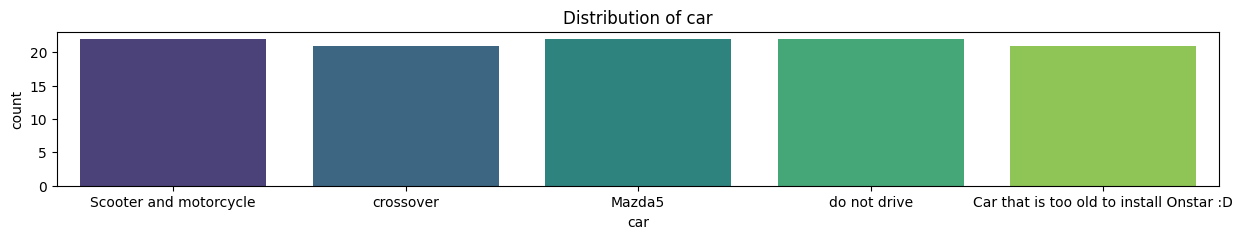

C:\Users\Sohaa\AppData\Local\Temp\ipykernel_25696\2553445922.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='viridis')


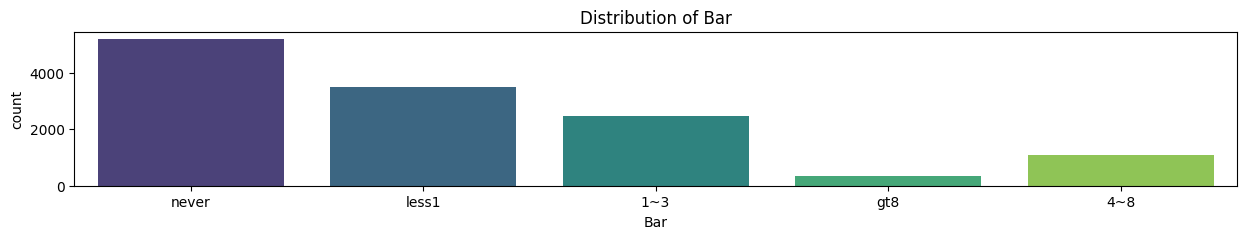

C:\Users\Sohaa\AppData\Local\Temp\ipykernel_25696\2553445922.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='viridis')


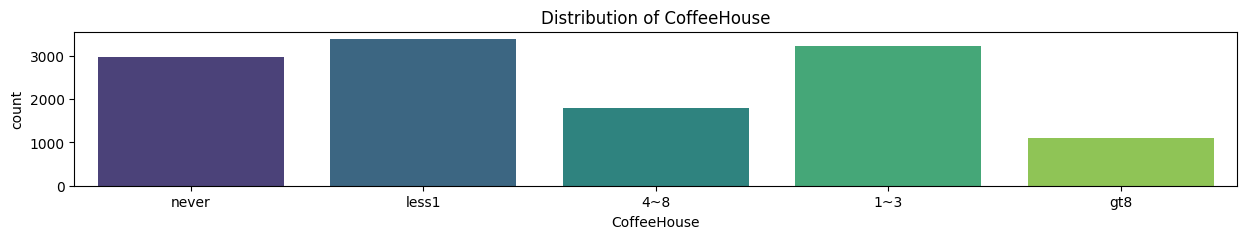

C:\Users\Sohaa\AppData\Local\Temp\ipykernel_25696\2553445922.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='viridis')


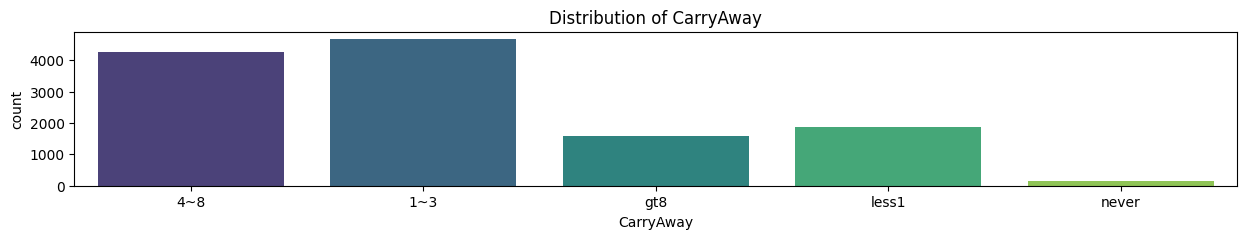

C:\Users\Sohaa\AppData\Local\Temp\ipykernel_25696\2553445922.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='viridis')


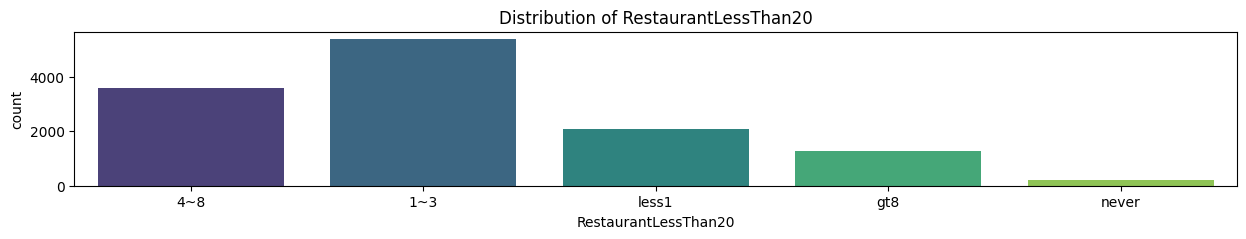

C:\Users\Sohaa\AppData\Local\Temp\ipykernel_25696\2553445922.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='viridis')


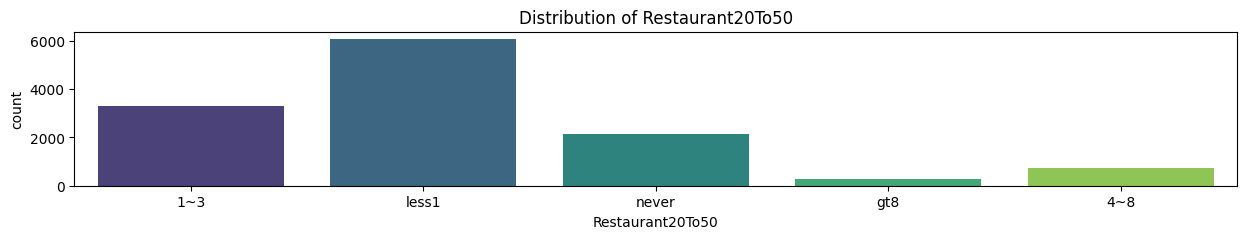

In [5]:
cols_with_missing = ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in cols_with_missing:
    plt.figure(figsize=(15, 2))
    sns.countplot(x=col, data=data, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.show()


3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
data['CarryAway'].mode()[0]

'1~3'

In [7]:
for col in cols_with_missing:
    data[col].fillna(data[col].mode()[0], inplace=True)


data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [8]:
print(data.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [9]:
data['Y'].value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

In [10]:
data['Y'].value_counts()
per=(data['Y']==1).mean()* 100
print(f'{per:.2f}%')

56.84%


5. Use a bar plot to visualize the `coupon` column.

C:\Users\Sohaa\AppData\Local\Temp\ipykernel_25696\3109957790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='coupon', data=data, palette='viridis')


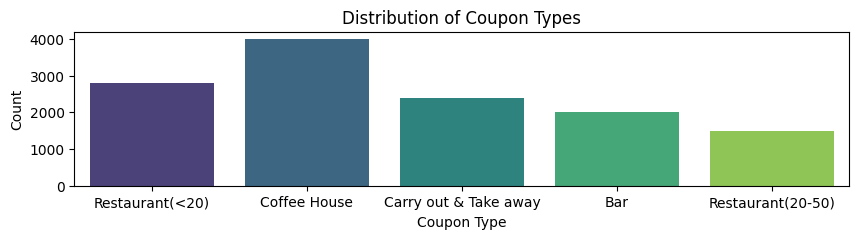

In [143]:
plt.figure(figsize=(10, 2))
sns.countplot(x='coupon', data=data, palette='viridis')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.show()

6. Use a histogram to visualize the temperature column.

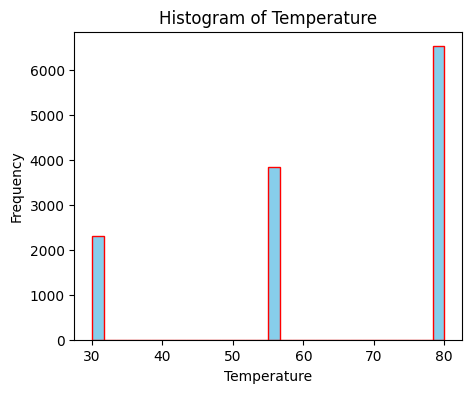

In [12]:

plt.figure(figsize=(5, 4))
plt.hist(data['temperature'], bins=30, color='skyblue', edgecolor='red')
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [22]:
bar_coupons_df = data[data['coupon'] == 'Bar'].copy()


bar_coupons_df.head()



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [15]:
bar_coupons_df['Y'].value_counts()
per_=(bar_coupons_df['Y']==1).mean()* 100
print(f'{per_:.2f}%')

41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [122]:
bar_coupons_df['age'].value_counts()

age
21.0    417
26.0    395
31.0    339
36.0    209
41.0    178
46.0    109
Name: count, dtype: int64

<BarContainer object of 2 artists>

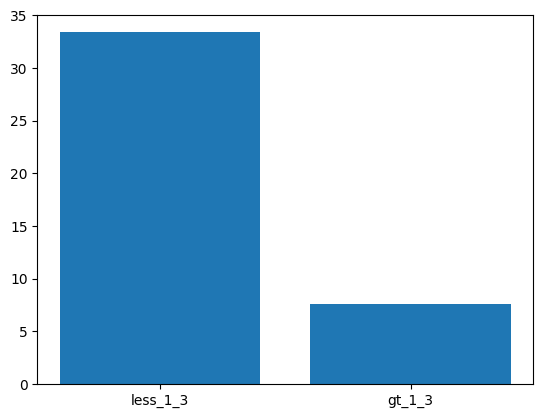

In [58]:
less_1_3 = ((bar_coupons_df['Bar'] == '1~3' ) | (bar_coupons_df['Bar'] == 'never' ) | (bar_coupons_df['Bar'] == 'less1' )) & (bar_coupons_df['Y'] == 1 )
gt_1_3=((bar_coupons_df['Bar'] == '4~8' ) | (bar_coupons_df['Bar'] == 'gt8' )) & (bar_coupons_df['Y'] == 1 )
less1_count=less_1_3.value_counts()
less1_p=(less1_count[True]/len(less_1_3))*100

gt_1_3_count=gt_1_3.value_counts()
gt_p=(gt_1_3_count[True]/len(gt_1_3))*100

x=['less_1_3','gt_1_3']
y=[less1_p , gt_p]
plt.bar( x , y )


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [141]:

bar_coupons_df['age'] = pd.to_numeric(bar_coupons_df['age'], errors='coerce')

ydf=bar_coupons_df[bar_coupons_df['Y'] == 1]
filtered_data =(ydf['Bar'].isin(['1~3', '4~8','gt8'])) & (ydf['age'] > 25) 

filtered_data2 =(ydf['Bar'].isin(['1~3', '4~8','gt8 '])) & (ydf['age'] < 25) 


count=filtered_data.value_counts()

count2=filtered_data2.value_counts()

gt25=(count[True]/len(ydf))*100
less_25=(count2[True]/len(ydf))*100
print(gt25, less_25)


29.866989117291414 12.212817412333736


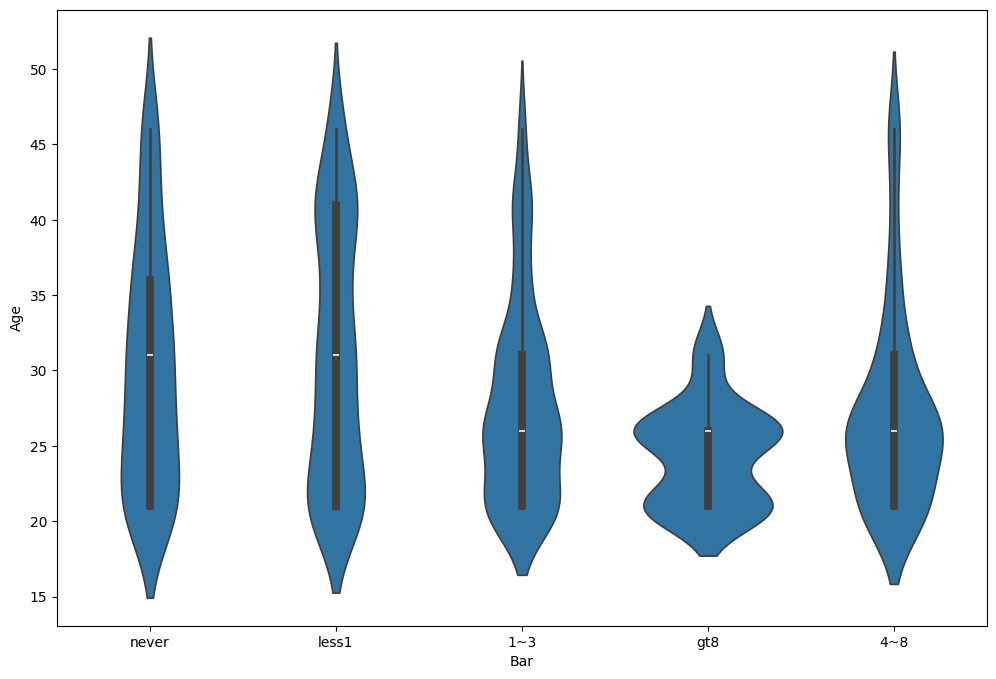

In [189]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Bar', y='age', data=ydf)
plt.xlabel('Bar')
plt.ylabel('Age')

plt.show()

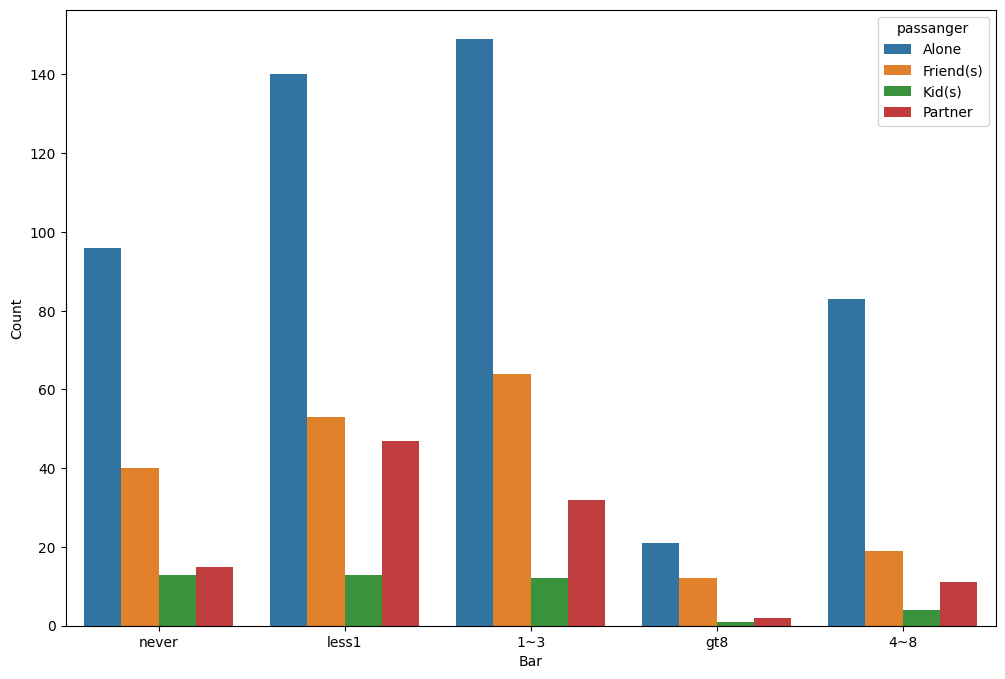

In [180]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Bar', hue='passanger', data=ydf)  
plt.xlabel('Bar')
plt.ylabel('Count')
  
plt.show()


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [137]:

#df=bar_coupons_df[bar_coupons_df['Y'] == 1]
#conditions =(df['Bar'].isin(['1~3', '4~8','gt8 '])) & (df['passanger'] !='Kid(s)') & (~df['occupation'].isin(['Farming Fishing & Forestry']))


ydf = bar_coupons_df[bar_coupons_df['Y'] == 1]

# Define the conditions
conditions = (
    (ydf['Bar'].isin(['1~3', '4~8','gt8 '])) &
    (ydf['passanger'] != 'Kid(s)') &
    (~ydf['occupation'].isin(['Farming', 'Fishing', 'Forestry']))
)

# Filter the data based on the conditions
filtered_data = ydf[conditions]

# Calculate acceptance rate
acceptance_rate = filtered_data.shape[0] / ydf.shape[0]

# Print or visualize the result
print(f"Acceptance Rate: {acceptance_rate}")


Acceptance Rate: 0.4328899637243047


In [138]:

bar_coupons_df['occupation'].value_counts()


occupation
Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Phys

In [39]:

bar_coupons_df['has_children'].value_counts()


has_children
0    1142
1     875
Name: count, dtype: int64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [136]:
#go to bars more than once a month and are under the age of 30 
 ydf = bar_coupons_df[bar_coupons_df['Y'] == 1]
filtered_data =(ydf['Bar'].isin(['1~3', '4~8','gt8 '])) & (ydf['age'] < 30) 
count3=filtered_data.value_counts()
less30=(count3[True]/len(ydf))*100
less30


26.23941958887545

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Rate of Coupon Acceptance Hypothesis:

My hypothesis posits that the likelihood of accepting bar coupons is notably higher among individuals who frequent bars 1-3 times a month. This inference suggests that those who maintain a more regular bar attendance, particularly in the range of 1-3 times a month, demonstrate a heightened inclination to accept promotional bar coupons. The underlying assumption revolves around the idea that individuals with a consistent pattern of bar visits are more likely to perceive added value in utilizing coupon offers. This inclination may be influenced by the established habit and familiarity with the bar scene.

Age and Coupon Acceptance Hypothesis:

Building on this, the hypothesis suggests a positive correlation between age and the frequency of bar visits. Specifically, there is an expectation that as individuals age, their propensity to go to the bar increases. Notably, a more detailed examination reveals a significant surge in bar visits between the ages of 26 and 30. 





### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [166]:
data['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [149]:
Restaurant_coupons_df = data[data['coupon'] == 'Restaurant(<20)'].copy()
Restaurant_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
10,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
11,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1


In [159]:
Restaurant_coupons_df['age'] = pd.to_numeric(Restaurant_coupons_df['age'], errors='coerce')
Restaurant_coupons_df['income'] = pd.to_numeric(Restaurant_coupons_df['income'], errors='coerce')

data2= Restaurant_coupons_df[Restaurant_coupons_df['Y'] == 1]

filtered1 =(data2['RestaurantLessThan20'].isin(['1~3', '4~8','gt8'])) & (data2['age'] > 25) 

filtered2 =(data2['RestaurantLessThan20'].isin(['1~3', '4~8','gt8 '])) & (data2['age'] < 25) 


r1=filtered1.value_counts()

r2=filtered2.value_counts()

more25=(r1[True]/len(data2))*100
less25=(r2[True]/len(data2))*100
print(more25, less25)

50.609137055837564 15.431472081218276


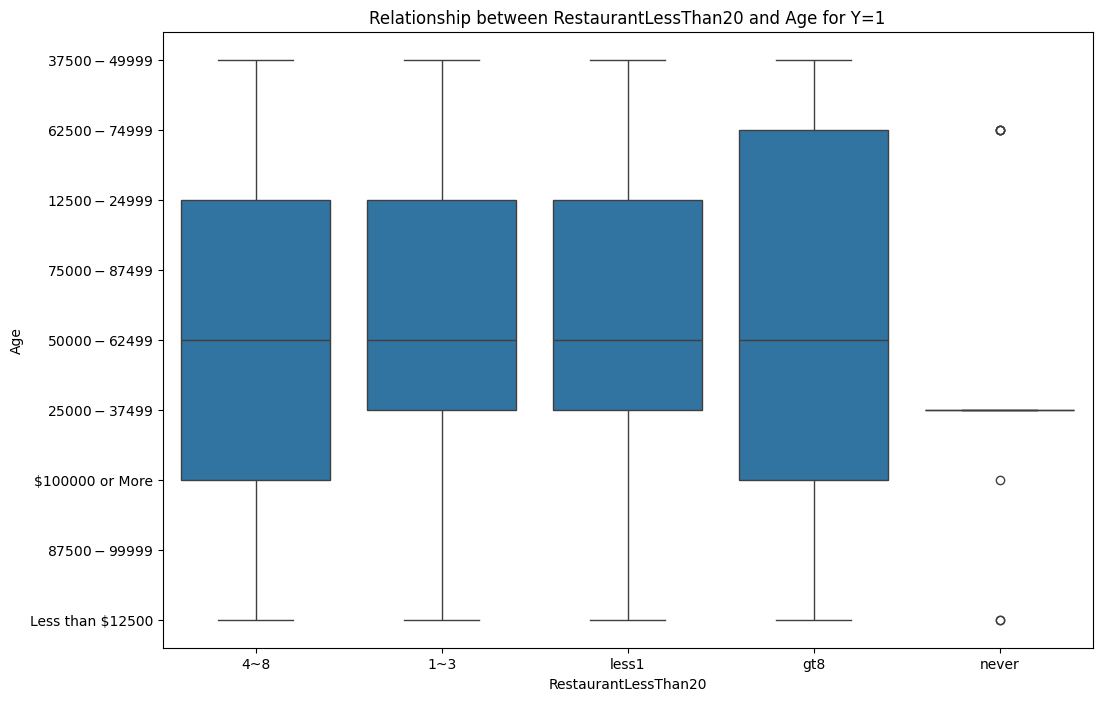

In [171]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='RestaurantLessThan20', y='income', data=data2)
plt.xlabel('RestaurantLessThan20')
plt.ylabel('Age')
plt.title('Relationship between RestaurantLessThan20 and Age for Y=1')
plt.show()


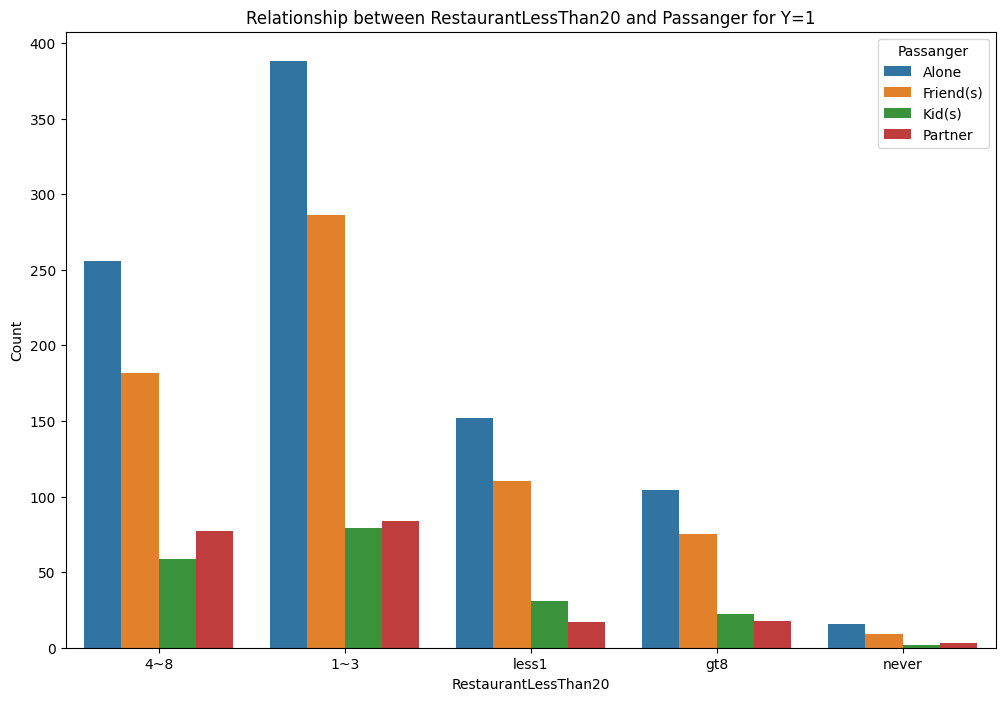

In [173]:
plt.figure(figsize=(12, 8))
sns.countplot(x='RestaurantLessThan20', hue='passanger', data=data2)  
plt.xlabel('RestaurantLessThan20')
plt.ylabel('Count')
plt.title('Relationship between RestaurantLessThan20 and Passanger for Y=1')
plt.legend(title='Passanger')  
plt.show()

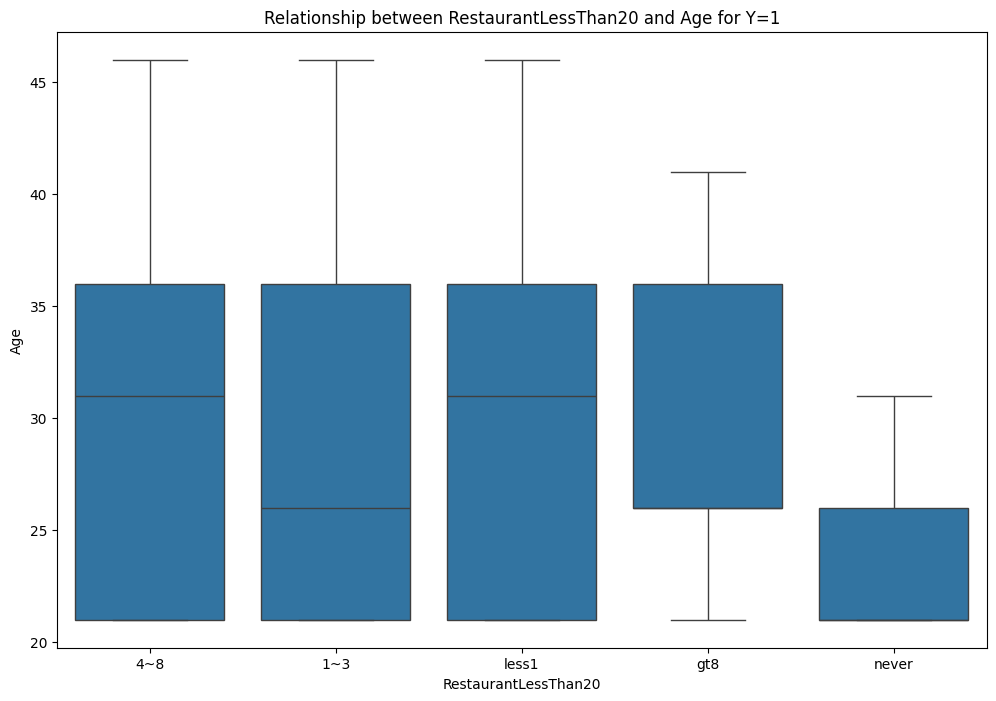

In [181]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='RestaurantLessThan20', y='age', data=data2)
plt.xlabel('RestaurantLessThan20')
plt.ylabel('Age')
plt.title('Relationship between RestaurantLessThan20 and Age for Y=1')
plt.show()